<h1><center>No-Show Appointments</center></h1>
<h2><center>Data Analysis</center></h2>
<img src='https://image.flaticon.com/icons/svg/504/504180.svg'  width = 130 height = 130>

<h3><center>Alhanuof Alhamad</center></h3>



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This document provide an anlysis for a dataset with over 100k medical appointment in Brazil, the goal is to determine if the patient will show up to his\her appointment or not. <br>
The focuse here is on a single dependent variable that hold the show up value. <br>
The independent variables that might or might not effect the show up value:
<ol>
    <li>The patient's age.</li>
    <li>The patient's gender.</li>
    <li>The patient's health record(if she/he has chronic diseases).</li>
    <li>The SMS.</li>
    <li>The duration between the scheduled day and the appointment day.</li>
</ol>

The questions that will be analysed:
<ul>
<li>Is the patients' age and gender will help us to predict if they will show up for their scheduled appointment?</li>
<li>Is the patients' health record will help us to predict if they will show up for their scheduled appointment?</li>
<li>Will the patients show up for their scheduled appointment if they've recevied a SMS?</li>
<li>Is the duration between the day the patients scheduled thier appointment and the appointment day will help us to predict if they will show up to thier scheduled appointment?</li>
</ul>

In [1]:
# Importing packages needed for Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#The magic line
% matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling
### Load the file and take a look to its data:

In [2]:
# Load the file: 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#Take a look at the data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Check the datatype for each column and if it has null value, 
# using info() function:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is no null vlaues, but some columns' datatype has to be converted.

In [4]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

There are 110527 appointment id which is the same as number of records, so there is no duplicate.

In [5]:
#To find the age range:
#Youngest age:
df.groupby('Age')['PatientId'].count().head(1)

Age
-1    1
Name: PatientId, dtype: int64

In [6]:
#Oldest age:
df.groupby('Age')['PatientId'].count().tail(1)

Age
115    5
Name: PatientId, dtype: int64

In [7]:
df.groupby('Gender')['PatientId'].count()

Gender
F    71840
M    38687
Name: PatientId, dtype: int64

Data wrangling findings:
<ul>
    <li>There are 110527 recoreds (appointments).</li>
    <li>There are 62299 patients; 71840 are females, and 38687 are males.</li>
    <li>The patient age range is; -1(which is weird) to 115.</li>
</ul>

> For the patient with age = -1, I checked if she has another record to see her age but she has only one record.

In [8]:
# The patient with age = -1:
df.loc[df['PatientId'] == 465943158731293]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


## Data Cleaning

### Datatypes and null values:

There is no null value as info() function stated, but for the datatype:
<ul>
    <li><strong>PatientId</strong> convert int not float. IDs are integers normally.</li>
    <li><strong>ScheduledDay</strong> and AppintmentDay has object(string) datatype and it should be datetime datatype to analyze it easily.</li>
</ul>

In [9]:
#Convert PatientId to int64, using numpy's function astype(<datatype>):
df['PatientId'] = df['PatientId'].astype('int64')

#Convert the dates datatype to datetime, using pandas's function to_datetime():
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

#Check if it converted correctly
#df.info()
#df.head()

### Duplicates:

Since the data frame has over 110 thousand rows, it is time consuming to check for duplicates using <strong>duplicated()</strong> function.<br>
<strong>Sum()</strong> function will tell us the number of duplicated rows.

In [10]:
sum(df.duplicated())

0

The data frame doesn't have any duplicates. <br>

### Columns name:

For the columns' name, I would like it to be in the same format, just letters without spical characters (- or underscore). <br>
So, <strong>SMS'underscore'received</strong> and <strong>No-show</strong> would be SMSReveived and NoShow.

In [11]:
#To change columns' name, pandas's function rename() is used:
df = df.rename(columns={"SMS_received": "SMSReceived", "No-show": "NoShow"})

### Aggregating New Columns
#### DateDifference Column:

I think the duration between the schedule day and appointment is important, if it is long the patient might forget the appointment date.<br>
So, I'll add new column with that difference.

In [12]:
df['DateDifference'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

#### ChronicDisease Column: 

This column has two values 0 or 1. 0 if the patient has a chronic disease (hypertension or diabetes).<br>
They might care more about their health and go to their appointments.

In [13]:
#To check hipertension and diabetes columns, numpy's function where(condtion/s, exprestion1, exprestion2) is used:
df['ChronicDisease'] = np.where( (df['Hipertension']==1)|(df['Diabetes'] ==1), 1, 0)

### Dropping unused columns

After cleaning the data frame, I would like to drop the columns that I won't further use, to make improve the performance.

In [14]:
#Drop() to delete unwanted columns:
df = df.drop(columns=['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'Scholarship', 
                      'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'])

## Cleaning Result:

After cleaning and filtering the data frame, we got a simpler table that will be used in EDA section.

In [15]:
df.tail()

,Gender,Age,SMSReceived,NoShow,DateDifference,ChronicDisease
110522,F,56,1,No,34,0
110523,F,51,1,No,34,0
110524,F,21,1,No,40,0
110525,F,38,1,No,40,0
110526,F,54,1,No,40,0


<a id='eda'></a>
## Exploratory Data Analysis

To start off, I divided the data frame into two different data frames based on show up factor.

In [16]:
df_show = df[df['NoShow'] == 'No']
df_noshow = df[df['NoShow'] == 'Yes']

### Q1: Is the patients' age and gender will help us to predict if a they will show up for their scheduled appointment?

#### Gender:

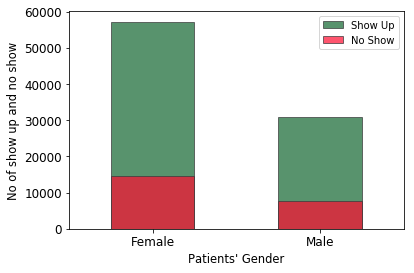

In [17]:
#df.groupby('Gender')['NoShow'].count().plot(kind = 'bar', title='Gender and show up',
 #                                            color = ['Pink', 'blue'], alpha=0.7, fontsize = 12)
df_show.groupby('Gender')['NoShow'].count().plot(kind='bar', color = '#11662F', alpha = 0.7, edgecolor = '#39393B',
                                           fontsize= 12, label = 'Show Up')
df_noshow.groupby('Gender')['NoShow'].count().plot(kind='bar', color = '#FF0D31', alpha = 0.7, edgecolor = '#39393B',
                                           fontsize= 12, label = 'No Show')
plt.xticks(np.arange(2), ('Female', 'Male'), rotation=0)
plt.legend()
plt.xlabel('Patients\' Gender', fontsize = 11.5)
plt.ylabel('No of show up and no show', fontsize = 11.5)
plt.show()

#### Result:
Female patients number are more than male patients, and females have more no show up than males. So patients' gender won't help us in predecting  if patients will show up for their scheduled appointment.

#### Age:

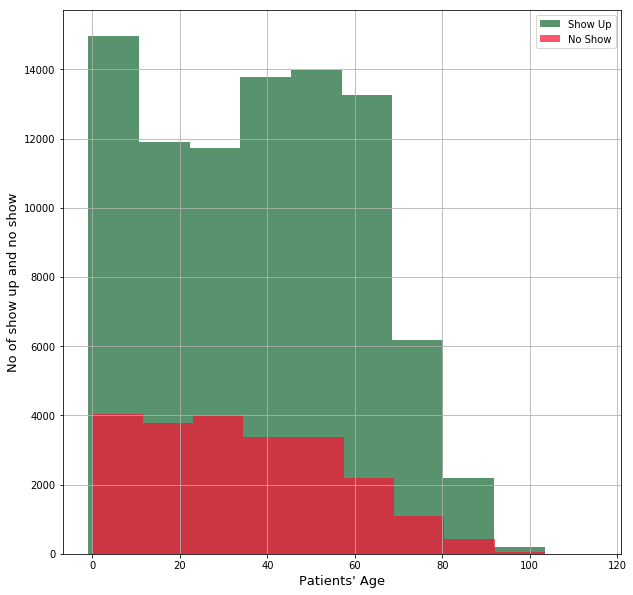

In [18]:
df_show['Age'].hist(alpha = 0.7, label = 'Show Up', 
                    figsize = (10, 10), color = '#11662F')
df_noshow['Age'].hist(alpha = 0.7, label = 'No Show', 
                      figsize = (10, 10), color = '#FF0D31')
plt.legend()
plt.xlabel('Patients\' Age', fontsize = 13)
plt.ylabel('No of show up and no show', fontsize = 13)
plt.show()

#### Result:
Patients' age graphs are <strong>skewed right</strong>.<br>
<ul>
<li>The age gruop (0-10) are more likely to show up.</li>
<li>The age gruop (0-10) and (23-35) are more likely to miss their appoinments.</li>
</ul>
Age group (0-10) have the largest value in both graphs.<br>
Since we have different number of patient for each age group, the age factor seems to be useless in predecting if patients will show up for their scheduled appointment.

### Q2: Will the patients show up for their scheduled appointment if they've recevied a SMS?

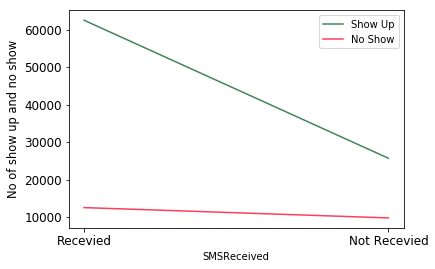

In [19]:
df_show.groupby('SMSReceived')['NoShow'].count().plot(kind='line', color = '#11662F', alpha = 0.8,
                                           fontsize= 12, label = 'Show Up')
df_noshow.groupby('SMSReceived')['NoShow'].count().plot(kind='line', color = '#FF0D31', alpha = 0.8, 
                                           fontsize= 12, label = 'No Show')
plt.xticks(np.arange(2), ('Recevied', 'Not Recevied'), rotation=0)
plt.legend()
plt.ylabel('No of show up and no show', fontsize = 11.5)
plt.show()

#### Result:

The patient who did not recevie the SMS are more than the patients who recevied it.For no show graph, the patients number are almost equal for both gruops. SMS do not effect the no show factor. SMS won't help us in predecting  if patients will show up for their scheduled appointment.

### Q3: Is the patients' health record will help us to predict if a they will show up for their scheduled appointment?

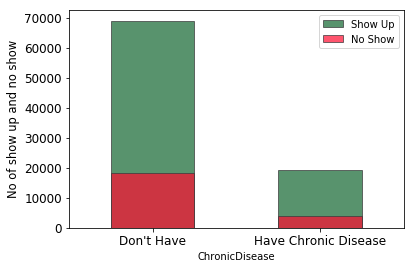

In [20]:
df_show.groupby('ChronicDisease')['NoShow'].count().plot(kind='bar', color = '#11662F', alpha = 0.7, edgecolor = '#39393B',
                                           fontsize= 12, label = 'Show Up')
df_noshow.groupby('ChronicDisease')['NoShow'].count().plot(kind='bar', color = '#FF0D31', alpha = 0.7, edgecolor = '#39393B',
                                           fontsize= 12, label = 'No Show')
plt.xticks(np.arange(2), ('Don\'t Have','Have Chronic Disease' ), rotation=0)
plt.legend()
plt.ylabel('No of show up and no show', fontsize = 11.5)
plt.show()

Text(0.5,1,"'No Show' Average for Chronic Disease factor")

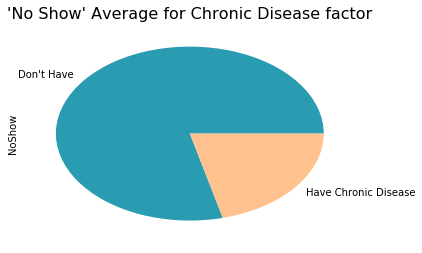

In [21]:
#Find the mean 
NoShowMean = df.groupby('ChronicDisease').count() / df.count()
NoShowMean['NoShow'].plot(kind='pie', colors = ['#2A9CB2', '#FFC28E'], labels = ['Don\'t Have','Have Chronic Disease'])
plt.title('\'No Show\' Average for Chronic Disease factor', fontsize = 16)

#### Result:

The patients who do not have a chronic diseases are more than the patients who have for both graphs. 
The pie chart shows that about quarter of the 'NoShow' are patients with chronic diseases.<br> 
Chronic disease factor do not effect the no show factor.Chronic factor won't help us in predecting if patients will show up for their scheduled appointment.<br>

### Q4: Is the duration between the day the patients scheduled thier appointment and the appointment day will help us to predict if they will show up to thier scheduled appointment?

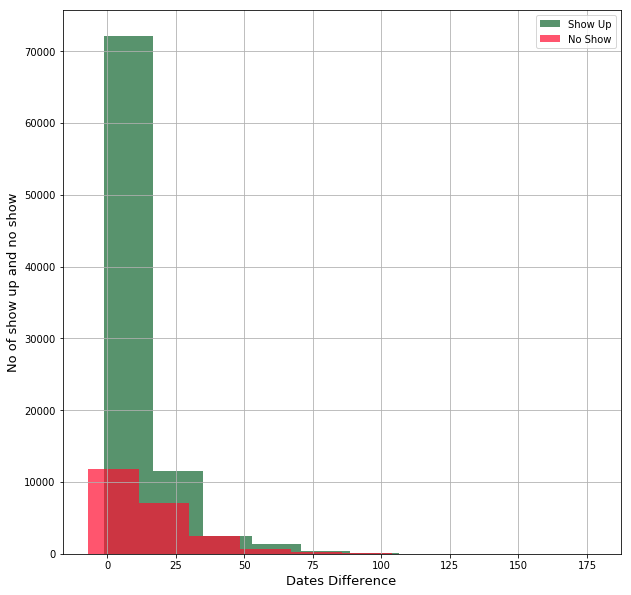

In [22]:
df_show['DateDifference'].hist(alpha = 0.7, label = 'Show Up', 
                    figsize = (10, 10), color = '#11662F')
df_noshow['DateDifference'].hist(alpha = 0.7, label = 'No Show', 
                      figsize = (10, 10), color = '#FF0D31')
plt.legend()
plt.xlabel('Dates Difference', fontsize = 13)
plt.ylabel('No of show up and no show', fontsize = 13)
plt.show()

#### Result:
The date difference graphs are <strong>skewed right</strong>.<br>
<ul>
<li>The date differnace between 0-17 days have significantly more number of patients and showing up.</li>
</ul>
It seems that the date differnce effect the showing up factor. The patients with date differnace less than 17 are more likely to show up.

<a id='conclusions'></a>
## Conclusions

After testing a set of factors to see whither the patients will show up or not with five independent varialbes (age, gender, SMS, chronic disease and date differeance), the result is only date differance will help us to predict if patient will show up or not.

### Limitations:
The data frame dosen't have equal number of patients for each tested gruops.



In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0